In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X = data["data"].copy()
y = data["target"].copy()

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

In [3]:
#as a support vector machine instead of SVM use SVC
#use LinearSVC for larger datasets
from sklearn.svm import LinearSVC
#specific linear SVC implementation that scales better to larger number of data
lin_svc_clf = LinearSVC(penalty="l2", #main parameter for the regularization
                       loss="squared_hinge",
                       tol=1e-4, #tolerance
                       C = 1,
                       max_iter=1000,
                       verbose=True)#ovr multiclass implementation
lin_svc_clf.fit(X_train, y_train)
lin_svc_clf.coef_,lin_svc_clf.classes_#weights for each feature

#result: 3 feature weights because we have 3 classifiers (multiclass classification)

[LibLinear].........................................................*.**
optimization finished, #iter = 588
Objective value = -0.678898
nSV = 5
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -80.240252
nSV = 105
....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -16.452060
nSV = 34


/home/simon/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(array([[ 0.18424176,  0.45123444, -0.8079372 , -0.45071415],
        [-0.13492158, -0.75080462,  0.52107112, -1.00255381],
        [-0.85723281, -0.88541502,  1.27992186,  1.83622266]]),
 array([0, 1, 2]))

In [4]:
#SVC: support vector classifier
from sklearn.svm import SVC
svc_clf_lin = SVC(C=1,
             kernel="linear", #for larger datasets instead of linear and SVC better use the LinearSVC
             probability=False,#When True gives predict_proba method, but heavily slows down training (performs 5x cv)
             max_iter = -1, #-1: no max iterations
             tol = 1e-3,
             verbose=True)
svc_clf_lin.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 12
obj = -0.748057, rho = -1.450042
nSV = 3, nBSV = 0
*
optimization finished, #iter = 5
obj = -0.203684, rho = -1.506890
nSV = 3, nBSV = 0
*
optimization finished, #iter = 37
obj = -15.692265, rho = -5.879098
nSV = 22, nBSV = 18
Total nSV = 26


SVC(C=1, kernel='linear', verbose=True)

In [5]:
#points of the support vectors for our support vector machine
svc_clf_lin.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.3, 3.3, 4.7, 1.6],
       [5.1, 2.5, 3. , 1.1],
       [6. , 2.7, 5.1, 1.6],
       [6. , 2.9, 4.5, 1.5],
       [6.7, 3. , 5. , 1.7],
       [5.6, 3. , 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [6.2, 2.2, 4.5, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [5.9, 3.2, 4.8, 1.8],
       [6.9, 3.1, 4.9, 1.5],
       [6.1, 3. , 4.9, 1.8],
       [5.9, 3. , 5.1, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 2.8, 4.8, 1.8],
       [6.3, 2.5, 5. , 1.9],
       [6. , 2.2, 5. , 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8],
       [4.9, 2.5, 4.5, 1.7]])

In [6]:
#for visualization: just pick out two of our features
X = data["data"][:,2:4].copy() #last 2 features of 4
y = data["target"].copy()
y[y==2] = 1 #This line relabels any target values of 2 to 1, likely for binary classification purposes

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    X_train = X[train_index]
    X_test = X[test_index]
    
    y_train = y[train_index]
    y_test = y[test_index]

In [7]:
#creating our linear classifier (now without fine tuning)
from sklearn.svm import SVC
svc_clf_lin = SVC(C=1,kernel="linear")
svc_clf_lin.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [9]:
#source: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
def plotResults(clf, X_train, y_train, xFeature, yFeature, kernel, C):
    """
    This function visualizes the decision boundary of a fitted SVM classifier.

    Args:
        clf: The trained SVM classifier model.
        X_train: Features of the training data.
        y_train: Target values of the training data.
        xFeature: Name of the first feature used for visualization.
        yFeature: Name of the second feature used for visualization.
        kernel: Kernel type used by the SVM (e.g., "linear", "rbf").
        C: Regularization parameter of the SVM.
    """

    # Plot the training data points with corresponding colors based on their class labels.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30)

    # Get the current plot limits.
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create a dense grid of points within the plot limits.
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx) #meshgrid(): Takes two 1D arrays (representing x and y coordinates) as input AND creates two 2D arrays as output:
    xy = np.vstack([XX.ravel(), YY.ravel()]).T #.ravel(): flattens a multidimensional array into a one-dimensional array

    # Use the model to predict decision function values for each grid point.
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Plot the decision boundary as contours with different colors for positive,
    # negative, and zero decision function values.
    ax.contour(XX, YY, Z, colors=['r','b','g'], levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])

    # Plot the support vectors as larger black circles.
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')

    # Add labels for the features and title with kernel type and regularization parameter.
    plt.xlabel("Scaled " + xFeature[:-5])
    plt.ylabel("Scaled " + yFeature[:-5])
    plt.title(kernel + " kernel" + " C = " + str(C))

    # Show the plot.
    plt.show()


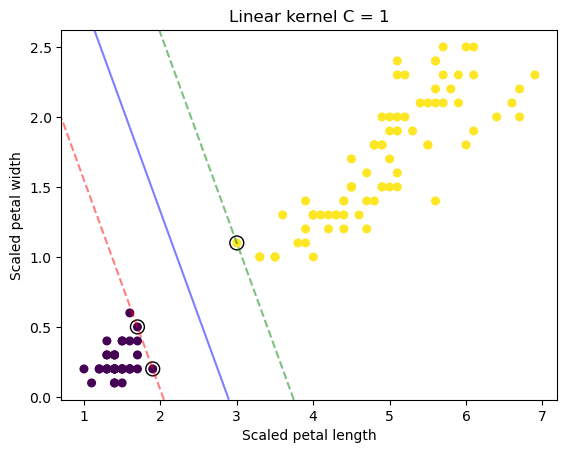

In [10]:
plotResults(svc_clf_lin, X_train, y_train, data["feature_names"][2], data["feature_names"][3], "Linear", 1)

In [11]:
#raw definition of our pipeline for later use
img_pipeline = Pipeline([("mm_scaler", MinMaxScaler())])
X_transf = img_pipeline.fit_transform(X_train)

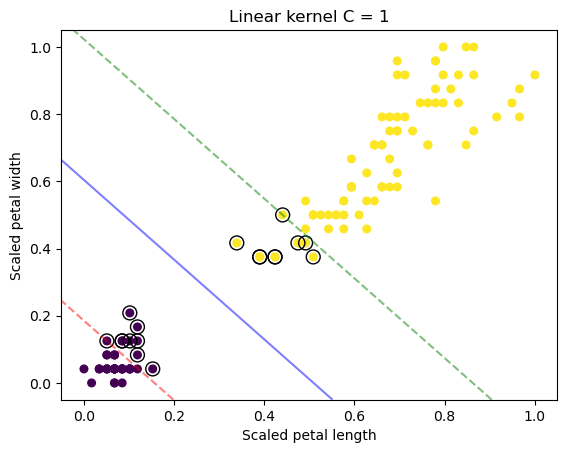

In [12]:
svc_clf_lin = SVC(C=1,kernel="linear")
svc_clf_lin.fit(X_transf, y_train) #now fit the linear kernel on the new transformed data (accessing the pipeline before)
plotResults(svc_clf_lin, X_transf, y_train, data["feature_names"][2], data["feature_names"][3], "Linear", 1)

In [13]:
#source: https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
def plotDecisionBoundary(svc, X, y, kernel, extra):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #-1 and +1 avoid gaps at the edges
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xx_r = xx.ravel()
    yy_r = yy.ravel()
    Z = svc.predict(np.c_[xx_r, yy_r])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0],X[:, 1],c=y)

    plt.title(f"SVM {kernel} kernel, {extra}")

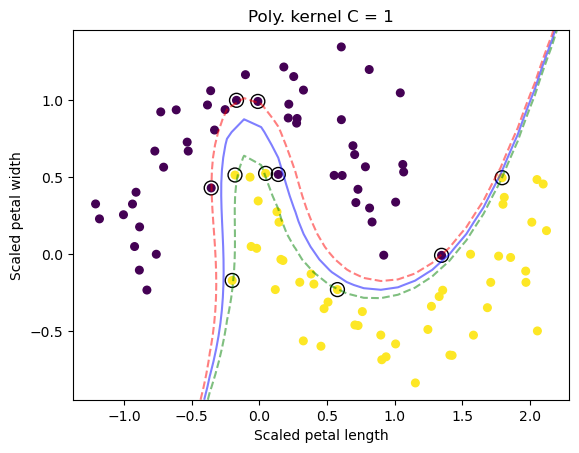

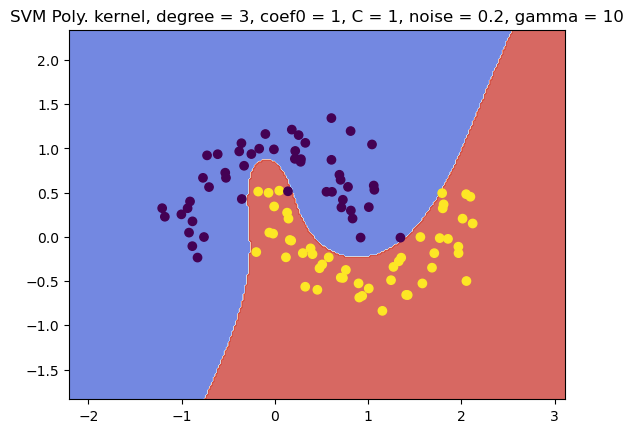

In [14]:
X_moon, y_moon = make_moons(noise=0.2, random_state=0)

svc_clf_poly = SVC(C=1,
                  kernel="poly", #for a polynomial data we just set the kernel to "poly"
                  degree = 3,
                  coef0 = 1,
                  gamma=10)
svc_clf_poly.fit(X_moon, y_moon)

#simple plotter
plotResults(svc_clf_poly, X_moon, y_moon, data["feature_names"][2], data["feature_names"][3], "Poly.", 1)

#strong visualization (looking much better)
plotDecisionBoundary(svc_clf_poly, X_moon, y_moon, "Poly.", "degree = 3, coef0 = 1, C = 1, noise = 0.2, gamma = 10")

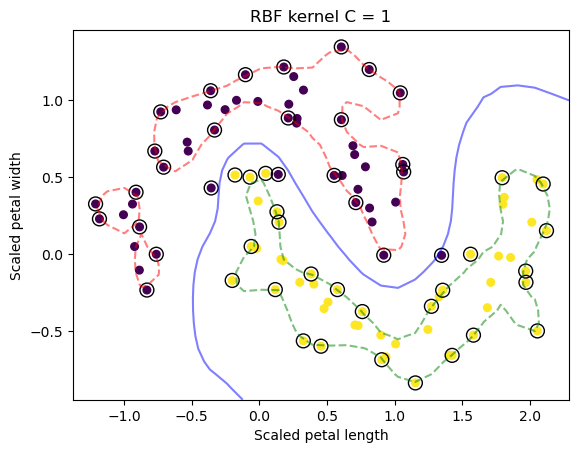

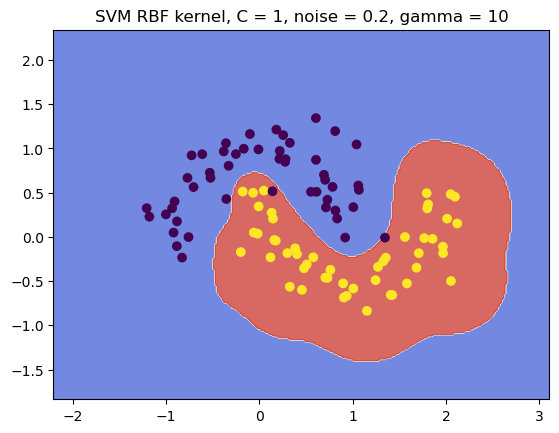

In [15]:
svc_clf_rbf = SVC(C=1,
                  kernel="rbf", #for kernel variables look at the sklearn documentation online
                  gamma=10)
svc_clf_rbf.fit(X_moon, y_moon)
plotResults(svc_clf_rbf, X_moon, y_moon, data["feature_names"][2], data["feature_names"][3], "RBF", 1)
plotDecisionBoundary(svc_clf_rbf, X_moon, y_moon, "RBF", "C = 1, noise = 0.2, gamma = 10")

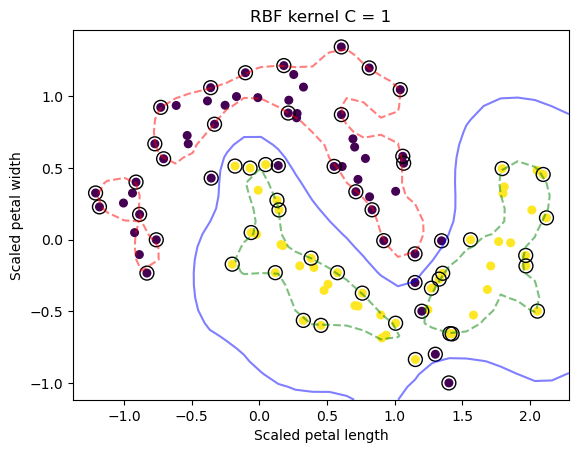

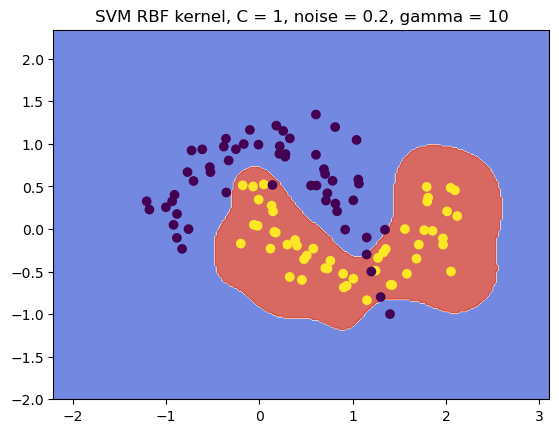

In [16]:
#now creating new points, adding them to the dataset and run the SVC afterwards
X_moon_new = np.append(X_moon,[[1.15,-0.1],[1.15,-0.3],[1.2,-0.5],[1.3,-0.8],[1.4,-1]]).reshape(-1,2)
y_moon_new = np.append(y_moon,[0,0,0,0,0])
svc_clf_rbf = SVC(C=1,
                  kernel="rbf",
                  gamma=10)
svc_clf_rbf.fit(X_moon_new, y_moon_new)
plotResults(svc_clf_rbf, X_moon_new, y_moon_new, data["feature_names"][2], data["feature_names"][3], "RBF", 1)
plotDecisionBoundary(svc_clf_rbf, X_moon_new, y_moon_new, "RBF", "C = 1, noise = 0.2, gamma = 10")

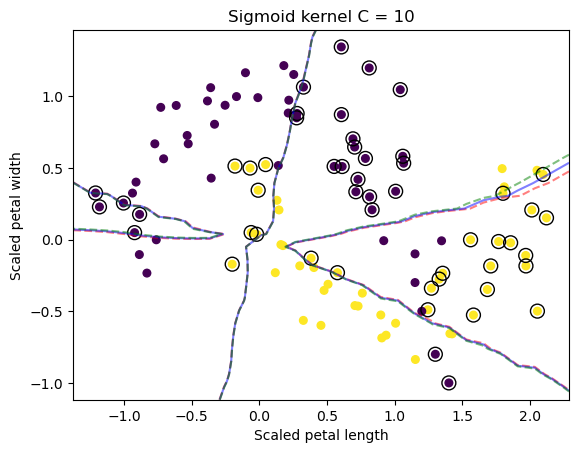

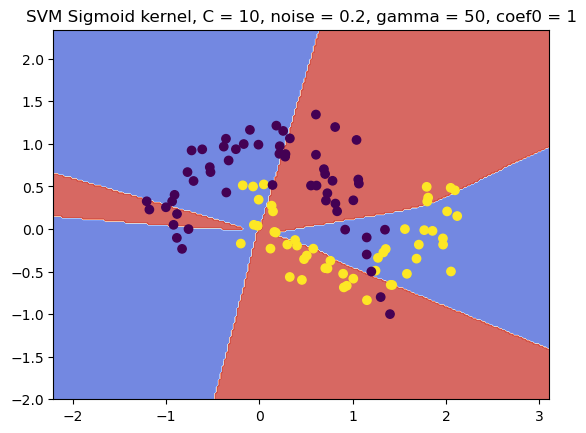

In [17]:
C = 10
gamma = 50
coef0 = 1
svc_clf_sig = SVC(C=C,
                  kernel="sigmoid",
                  gamma=gamma,
                 coef0 = coef0)
svc_clf_sig.fit(X_moon_new, y_moon_new)
plotResults(svc_clf_sig, X_moon_new, y_moon_new, data["feature_names"][2], data["feature_names"][3], "Sigmoid", C)
plotDecisionBoundary(svc_clf_sig, X_moon_new, y_moon_new, "Sigmoid", 
                     f"C = {C}, noise = 0.2, gamma = {gamma}, coef0 = {coef0}")